In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau


D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [92]:
f = open('1420608.csv')
data = pd.read_csv('1420608.csv', header = 0)
data.head
data.columns
data

,STATION,NAME,DATE,AWND,PRCP,SNOW,TMAX,TMIN,WSFG
0,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-01,NaN,0.00,0.0,62,41,NaN
1,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-02,NaN,0.00,0.0,54,39,NaN
2,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-03,NaN,0.00,0.0,58,34,NaN
3,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-04,NaN,0.00,0.0,64,42,NaN
4,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-05,NaN,0.00,0.0,67,43,NaN
5,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-06,NaN,0.00,0.0,74,43,NaN
6,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-07,NaN,0.00,0.0,64,40,NaN
7,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-08,NaN,0.00,0.0,57,39,NaN
8,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-09,NaN,0.00,0.0,59,41,NaN
9,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",1953-01-10,NaN,0.00,0.0,72,34,NaN


In [93]:
data = data.drop(data.columns[[0, 1, 8]], axis=1)
data = data.dropna()
data['DATE'] = data['DATE'].str.replace('-', '')
data.columns

Index(['DATE', 'AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')

In [4]:
data.values.shape

(12618, 6)

In [5]:
target_names = ['TMAX', 'TMIN']

In [50]:
dataPredictFrame = data[target_names].shift(-10)
dataPredictFrame


,TMAX,TMIN
11322,43.0,19.0
11323,49.0,30.0
11324,35.0,25.0
11325,33.0,27.0
11326,36.0,31.0
11327,42.0,26.0
11328,35.0,23.0
11329,26.0,17.0
11330,29.0,10.0
11331,33.0,18.0


In [51]:
x_data = data.values[0:-10]

In [52]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (12608, 6)


In [53]:
y_data = dataPredictFrame.values[:-10]

In [54]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (12608, 2)


In [55]:
train_split = 0.7

In [56]:
num_train = int(train_split * x_data.shape[0])
num_train

8825

In [58]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

12608

In [59]:
num_test = int(x_data.shape[0]) - num_train
num_test

3783

In [60]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

12608

In [61]:
num_x_signals = x_data.shape[1]
num_x_signals

6

In [62]:
num_y_signals = y_data.shape[1]
num_y_signals

2

In [63]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.fit_transform(x_test)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.fit_transform(y_test)

In [65]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(8825, 6)
(8825, 2)


In [66]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [67]:
batch_size = 64

In [68]:
sequence_length = 31

In [69]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [70]:
x_batch, y_batch = next(generator)

In [71]:
print(x_batch.shape)
print(y_batch.shape)

(64, 31, 6)
(64, 31, 2)


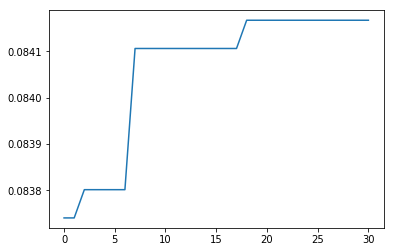

In [72]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

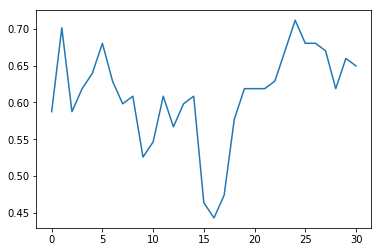

In [73]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [74]:
validation_data = (np.expand_dims(x_test_scaled, axis=0), np.expand_dims(y_test_scaled, axis=0))

In [75]:
model = Sequential()

In [76]:
model.add(GRU(units=512, return_sequences=True, input_shape=(None, num_x_signals,)))

In [77]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [78]:
if  False:
    from tensorflow.python.keras.initializerstensorfl  import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [79]:
warmup_steps = 20

In [80]:
def loss_mse_warmup(y_true, y_pred):
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [81]:
optimizer = RMSprop(lr=1e-3)

In [82]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 512)         797184    
_________________________________________________________________
dense_2 (Dense)              (None, None, 2)           1026      
Total params: 798,210
Trainable params: 798,210
Non-trainable params: 0
_________________________________________________________________


In [84]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [85]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [86]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [87]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [88]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [94]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)
saver.save(session, LOG_DIR/model.ckpt, step)

Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00001: val_loss improved from inf to 0.01761, saving model to 23_checkpoint.keras
100/100 [==============================] - 78s 776ms/step - loss: 0.0184 - val_loss: 0.0176
Epoch 2/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0127
Epoch 00002: val_loss improved from 0.01761 to 0.01527, saving model to 23_checkpoint.keras
100/100 [==============================] - 76s 760ms/step - loss: 0.0127 - val_loss: 0.0153
Epoch 3/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0119
Epoch 00003: val_loss improved from 0.01527 to 0.01389, saving model to 23_checkpoint.keras
100/100 [==============================] - 76s 760ms/step - loss: 0.0118 - val_loss: 0.0139
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00004: val_loss did not improve

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [===============

NameError: name 'saver' is not defined

In [94]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [95]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))
print(result)

1/1 [==============================] - 7s 7s/step
0.013815592043101788


In [96]:
print(y_test_scaled[-10:]*100)


[[ 98.88888889  93.15068493]
 [ 98.88888889  90.4109589 ]
 [ 93.33333333  94.52054795]
 [ 86.66666667  87.67123288]
 [ 88.88888889  87.67123288]
 [ 92.22222222  89.04109589]
 [ 87.77777778 100.        ]
 [ 90.          93.15068493]
 [ 90.          91.78082192]
 [ 77.77777778  80.82191781]]


TypeError: 'int' object is not subscriptable